In [1]:
import matplotlib.pyplot as plt
import numpy as np
from getsig import getsig
from dd_df import get_shot_title
#
plt.style.use('helvet2')

In [32]:
shotnr = 35156
intervals = [[0,1.8],[1.8,2.0],[2.0,3.0],[3.0,5.0],[5.0,7.0]]

In [20]:
tBegin = np.min(np.array(interv))
tEnd = np.max(np.array(interv))
prnt = False

titlestr = get_shot_title(shotnr)

lwid = 2

ip = getsig(shotnr, "MAG", "Ipa", tBegin=tBegin, tEnd=tEnd)
wmhd = getsig(shotnr, "FPG", "Wmhd", tBegin=tBegin, tEnd=tEnd)
q95 = getsig(shotnr, "FPG", "q95", tBegin=tBegin, tEnd=tEnd)

h1 = getsig(shotnr, "DCN", "H-1", tBegin=tBegin, tEnd=tEnd)
h5 = getsig(shotnr, "DCN", "H-5", tBegin=tBegin, tEnd=tEnd)

ecrh = getsig(shotnr, "ECS", "PECRH", tBegin=tBegin, tEnd=tEnd)
nbi = getsig(shotnr, "NIS", "PNI", tBegin=tBegin, tEnd=tEnd)
prad= getsig(shotnr, "BPD", "Pradtot", tBegin=tBegin, tEnd=tEnd)

dtot = getsig(shotnr, "UVS", "D_tot", tBegin=tBegin, tEnd=tEnd)
ntot = getsig(shotnr, "UVS", "N_tot", tBegin=tBegin, tEnd=tEnd)
artot = getsig(shotnr, "UVS", "CFA03A", tBegin=tBegin, tEnd=tEnd)

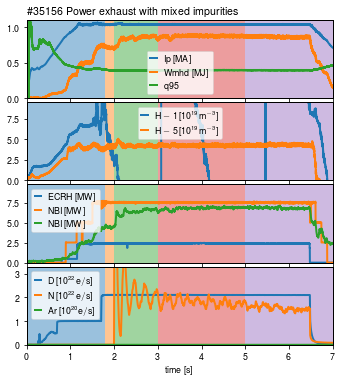

In [37]:
#############First plot
f, ax = plt.subplots(
        nrows=4, ncols=1, sharex=True, sharey=False, 
        gridspec_kw={'height_ratios':[1,1,1,1]},figsize=(5, 5.5))

hdl_len = 0.7
alphaval = 0.45

plt.setp(ax[0].get_xticklabels(), visible=False)

#ax[0].text(0.02, 0.85, r"$\mathrm{Ip\,[MA]}$", color="k", transform = ax[0].transAxes)
#ax[0].text(0.37, 0.85, r"$\mathrm{Wmhd\,[MJ]}$", color="b", transform = ax[0].transAxes)
#ax[0].text(0.72, 0.85, r"$\mathrm{q95\,[10]}$", color="#00BB00", transform = ax[0].transAxes)

ax[0].set_title(titlestr, loc='left')

ax[0].set_ylim([0,1.1])
ax[0].plot(ip.time, ip.data*1e-6, label=r"$\mathrm{Ip\,[MA]}$", lw=lwid)
ax[0].plot(wmhd.time, wmhd.data*1e-6, label="Wmhd [MJ]", lw=lwid)
ax[0].plot(q95.time, -q95.data/10.0, label="q95", lw=lwid)

ax[0].legend(loc='best', handlelength=hdl_len)
#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon = False)

#############Second plot
plt.setp(ax[1].get_xticklabels(), visible=False)

#ax[1].text(0.02, 0.85, r"$\mathrm{H-1\,[10^{19}m^{-3}]}$", color="k", transform = ax[1].transAxes)
#ax[1].text(0.37, 0.85, r"$\mathrm{H-5\,[10^{19}m^{-3}]}$", color="b", transform = ax[1].transAxes)
#ax[1].text(0.72, 0.85, r"$\mathrm{D\,[10^{21}e/s]}$", color="r", transform = ax[1].transAxes)

ax[1].set_ylim([0,9.5])
ax[1].plot(h1.time, h1.data*1e-19, label=r"$\mathrm{H-1\,[10^{19}m^{-3}]}$", lw=lwid)
ax[1].plot(h5.time, h5.data*1e-19, label=r"$\mathrm{H-5\,[10^{19}m^{-3}]}$", lw=lwid)

ax[1].legend(loc='best', handlelength=hdl_len)
#ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon = False)
#############Third plot

ax[2].plot(ecrh.time, ecrh.data*1e-6, label=r"$\mathrm{ECRH\,[MW]}$", lw=lwid)
ax[2].plot(nbi.time, nbi.data*1e-6, label=r"$\mathrm{NBI\,[MW]}$", lw=lwid)
ax[2].plot(prad.time, prad.data*1e-6, label=r"$\mathrm{NBI\,[MW]}$", lw=lwid)

#ax[2].text(0.02, 0.85, r"$\mathrm{ECRH\,[MW]}$", color="#009900", transform = ax[2].transAxes)
#ax[2].text(0.37, 0.85, r"$\mathrm{NBI\,[MW]}$", color="k", transform = ax[2].transAxes)
#ax[2].text(0.72, 0.85, r"$\mathrm{Prad\,[MW]}$", color="r", transform = ax[2].transAxes)

ax[2].legend(loc='best', handlelength=hdl_len)

ax[2].set_ylim([0,9.8])

#ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon = False)

ax[3].plot(dtot.time, dtot.data*1e-22, label=r"$\mathrm{D\,[10^{22}e/s]}$", lw=lwid)
ax[3].plot(ntot.time, ntot.data*1e-22, label=r"$\mathrm{N\,[10^{22}e/s]}$", lw=lwid)
ax[3].plot(artot.time, artot.data*1e-20, label=r"$\mathrm{Ar\,[10^{20}e/s]}$", lw=lwid)

ax[3].legend(loc='best', handlelength=hdl_len)

ax[3].set_ylim(0,3.3)
ax[3].set_xlabel("time [s]")
#######################
ax[3].set_xlim([tBegin,tEnd])

clrs = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

for interv, i in zip(intervals, range(len(intervals))):
    for axa in ax:
        axa.axvspan(interv[0], interv[1], facecolor=clrs[i], alpha=alphaval)


plt.subplots_adjust(left=0.1, bottom=0.12, right=0.95, top=0.94, wspace=0.26, hspace=0.05)
#plt.tight_layout()
plt.show()
#plt.savefig("shot.png", dpi=300)

In [38]:
def overview_plot(shotnr, intervals=[[0,1.8],[1.8,2.0],[2.0,3.0],[3.0,5.0],[5.0,7.0]], print_fig=False):
    tBegin = np.min(np.array(interv))
    tEnd = np.max(np.array(interv))
    prnt = False

    titlestr = get_shot_title(shotnr)

    lwid = 2

    ip = getsig(shotnr, "MAG", "Ipa", tBegin=tBegin, tEnd=tEnd)
    wmhd = getsig(shotnr, "FPG", "Wmhd", tBegin=tBegin, tEnd=tEnd)
    q95 = getsig(shotnr, "FPG", "q95", tBegin=tBegin, tEnd=tEnd)

    h1 = getsig(shotnr, "DCN", "H-1", tBegin=tBegin, tEnd=tEnd)
    h5 = getsig(shotnr, "DCN", "H-5", tBegin=tBegin, tEnd=tEnd)

    ecrh = getsig(shotnr, "ECS", "PECRH", tBegin=tBegin, tEnd=tEnd)
    nbi = getsig(shotnr, "NIS", "PNI", tBegin=tBegin, tEnd=tEnd)
    prad= getsig(shotnr, "BPD", "Pradtot", tBegin=tBegin, tEnd=tEnd)

    dtot = getsig(shotnr, "UVS", "D_tot", tBegin=tBegin, tEnd=tEnd)
    ntot = getsig(shotnr, "UVS", "N_tot", tBegin=tBegin, tEnd=tEnd)
    artot = getsig(shotnr, "UVS", "CFA03A", tBegin=tBegin, tEnd=tEnd)
    
    #############First plot
    f, ax = plt.subplots(
        nrows=4, ncols=1, sharex=True, sharey=False, 
        gridspec_kw={'height_ratios':[1,1,1,1]},figsize=(5, 5.5))

    hdl_len = 0.7
    alphaval = 0.45

    plt.setp(ax[0].get_xticklabels(), visible=False)

    ax[0].set_title(titlestr, loc='left')

    ax[0].set_ylim([0,1.1])
    ax[0].plot(ip.time, ip.data*1e-6, label=r"$\mathrm{Ip\,[MA]}$", lw=lwid)
    ax[0].plot(wmhd.time, wmhd.data*1e-6, label="Wmhd [MJ]", lw=lwid)
    ax[0].plot(q95.time, -q95.data/10.0, label="q95", lw=lwid)

    ax[0].legend(loc='best', handlelength=hdl_len)


    #############Second plot
    plt.setp(ax[1].get_xticklabels(), visible=False)

    ax[1].set_ylim([0,9.5])
    ax[1].plot(h1.time, h1.data*1e-19, label=r"$\mathrm{H-1\,[10^{19}m^{-3}]}$", lw=lwid)
    ax[1].plot(h5.time, h5.data*1e-19, label=r"$\mathrm{H-5\,[10^{19}m^{-3}]}$", lw=lwid)

    ax[1].legend(loc='best', handlelength=hdl_len)
    #############Third plot

    ax[2].plot(ecrh.time, ecrh.data*1e-6, label=r"$\mathrm{ECRH\,[MW]}$", lw=lwid)
    ax[2].plot(nbi.time, nbi.data*1e-6, label=r"$\mathrm{NBI\,[MW]}$", lw=lwid)
    ax[2].plot(prad.time, prad.data*1e-6, label=r"$\mathrm{NBI\,[MW]}$", lw=lwid)

    ax[2].legend(loc='best', handlelength=hdl_len)

    ax[2].set_ylim([0,9.8])

    ax[3].plot(dtot.time, dtot.data*1e-22, label=r"$\mathrm{D\,[10^{22}e/s]}$", lw=lwid)
    ax[3].plot(ntot.time, ntot.data*1e-22, label=r"$\mathrm{N\,[10^{22}e/s]}$", lw=lwid)
    ax[3].plot(artot.time, artot.data*1e-20, label=r"$\mathrm{Ar\,[10^{20}e/s]}$", lw=lwid)

    ax[3].legend(loc='best', handlelength=hdl_len)

    ax[3].set_ylim(0,3.3)
    ax[3].set_xlabel("time [s]")
    #######################
    ax[3].set_xlim([tBegin,tEnd])

    clrs = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

    for interv, i in zip(intervals, range(len(intervals))):
        for axa in ax:
            axa.axvspan(interv[0], interv[1], facecolor=clrs[i], alpha=alphaval)


    plt.subplots_adjust(left=0.1, bottom=0.12, right=0.95, top=0.94, wspace=0.26, hspace=0.05)
    #plt.tight_layout()
    
    if print_fig == True:
        fname = "./Images/overview_"+str(shotnr)+'.png'
        plt.savefig(fname, dpi=300)
    
    plt.show()